In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from patsy import dmatrices
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend, figure

### Here you will find: 

- Initial data summary
- Multivariable linear regression assumption test.
- MMM with daily data
- MMM with Weekly data.
- Log-log model.

In [6]:
# Load the model data
df = pd.read_csv('B.csv',dtype={
    'Revenue': np.float64,
    'Google SA': np.float64,
    'Microsoft SA': np.float64,
    'FB SA': np.float64,
    'FB BW': np.float64,
}, parse_dates=['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week
df.head()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39211/1008072034.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekNumber'] = pd.DatetimeIndex(df['Date']).week


,Date,Google SA,Microsoft SA,FB SA,FB BW,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,18.89,0.0,0.0,0.0,NaN,2018,1,2018-1,1
1,2018-01-02,14.59,0.0,0.0,0.0,NaN,2018,1,2018-1,1
2,2018-01-03,14.16,0.0,0.0,0.0,NaN,2018,1,2018-1,1
3,2018-01-04,11.62,0.0,0.0,0.0,NaN,2018,1,2018-1,1
4,2018-01-05,21.82,0.0,0.0,0.0,NaN,2018,1,2018-1,1


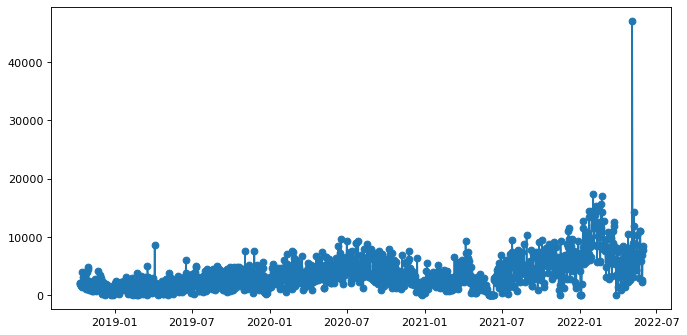

In [7]:
figure(figsize=(10, 5), dpi=80)
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.show()

## Data Quality and Analysis

### NaN Values

In [8]:
df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39211/742069122.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df[df != 0.0].drop('Year_Month', 1).isna().groupby(df.Year_Month, sort=False).sum().reset_index()


,Year_Month,Date,Google SA,Microsoft SA,FB SA,FB BW,Revenue,Year,Month,WeekNumber
0,2018-1,0,0,31,31,31,31,0,0,0
1,2018-2,0,0,28,28,28,28,0,0,0
2,2018-3,0,1,31,31,31,31,0,0,0
3,2018-4,0,1,30,30,30,30,0,0,0
4,2018-5,0,0,31,31,31,31,0,0,0
5,2018-6,0,0,30,30,30,30,0,0,0
6,2018-7,0,0,31,31,31,31,0,0,0
7,2018-8,0,0,31,31,31,31,0,0,0
8,2018-9,0,0,30,30,30,30,0,0,0
9,2018-10,0,0,31,31,31,9,0,0,0


In [9]:
df = df.fillna(0)
df.head()

,Date,Google SA,Microsoft SA,FB SA,FB BW,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,18.89,0.0,0.0,0.0,0.0,2018,1,2018-1,1
1,2018-01-02,14.59,0.0,0.0,0.0,0.0,2018,1,2018-1,1
2,2018-01-03,14.16,0.0,0.0,0.0,0.0,2018,1,2018-1,1
3,2018-01-04,11.62,0.0,0.0,0.0,0.0,2018,1,2018-1,1
4,2018-01-05,21.82,0.0,0.0,0.0,0.0,2018,1,2018-1,1


### Revenue Behaviour

In [10]:
df[['Revenue', 'Year']].groupby('Year').agg(['sum'])

,Revenue
,sum
Year,
2018,1.319192e+05
2019,7.839173e+05
2020,1.442661e+06
2021,1.391357e+06
2022,1.179112e+06


<AxesSubplot:title={'center':'Revenue'}, xlabel='[Year]'>

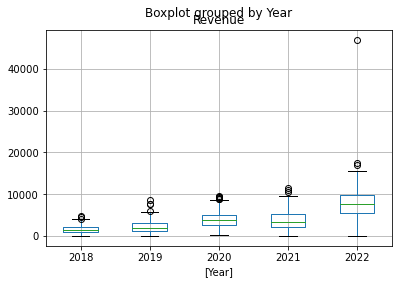

In [11]:
df2[['Revenue', 'Year']].boxplot(by='Year')

Conclusion

* 2019 Investment into marketing channels began at the end of the year
* 2020 because of covid has a lot of nuisance variables but their doesn't appear to be a lot of excessive noise data
* 2022 we don't have enough data.
* 2020 there are several periods without channel investment (probably because of COVID)

Focus the analysis on 2020-2021 data for now and see how later how the model holds in other periods

In [14]:
df_2021=df[df['Year']<2022].sort_values("Date").reset_index(drop=True)
df_2021.head()

,Date,Google SA,Microsoft SA,FB SA,FB BW,Revenue,Year,Month,Year_Month,WeekNumber
0,2018-01-01,18.89,0.0,0.0,0.0,0.0,2018,1,2018-1,1
1,2018-01-02,14.59,0.0,0.0,0.0,0.0,2018,1,2018-1,1
2,2018-01-03,14.16,0.0,0.0,0.0,0.0,2018,1,2018-1,1
3,2018-01-04,11.62,0.0,0.0,0.0,0.0,2018,1,2018-1,1
4,2018-01-05,21.82,0.0,0.0,0.0,0.0,2018,1,2018-1,1


In [15]:
df_2021=df_2021[df_2021['Year']>2019].sort_values("Date").reset_index(drop=True)
df_2021.head()

,Date,Google SA,Microsoft SA,FB SA,FB BW,Revenue,Year,Month,Year_Month,WeekNumber
0,2020-01-01,80.39,14.79,0.0,10.01,2936.71,2020,1,2020-1,1
1,2020-01-02,359.02,29.37,0.0,10.00,3081.64,2020,1,2020-1,1
2,2020-01-03,294.85,25.81,0.0,9.87,2103.87,2020,1,2020-1,1
3,2020-01-04,159.39,22.81,0.0,9.69,1414.10,2020,1,2020-1,1
4,2020-01-05,202.70,22.63,0.0,10.10,1783.76,2020,1,2020-1,1


## Investment and Revenue Behaviour

In [16]:
df_2021[["Google SA","Microsoft SA","FB SA","FB BW"]].agg(['sum'])

,Google SA,Microsoft SA,FB SA,FB BW
sum,226226.86,21147.03,12730.92,5895.15


### Variable Correlations

In [17]:
corr = df_2021[["Google SA","Microsoft SA","FB SA","FB BW"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/k2/8mbjx2mx4jg3bkxxj6m1xbs40000gn/T/ipykernel_39211/2137132009.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Google SA,Microsoft SA,FB SA,FB BW
Google SA,1.00,0.07,0.16,-0.06
Microsoft SA,0.07,1.00,-0.34,-0.02
FB SA,0.16,-0.34,1.00,0.06
FB BW,-0.06,-0.02,0.06,1.00


In [19]:
pca = PCA()
pca.fit(df_2021[["Google SA","Microsoft SA","FB SA","FB BW"]])
pca.explained_variance_ratio_ 

array([9.39474063e-01, 4.44929316e-02, 1.53716757e-02, 6.61329621e-04])

## Feature Importance

In [20]:
df_2021.isnull().any()

Date            False
Google SA       False
Microsoft SA    False
FB SA           False
FB BW           False
Revenue         False
Year            False
Month           False
Year_Month      False
WeekNumber      False
dtype: bool

<AxesSubplot:>

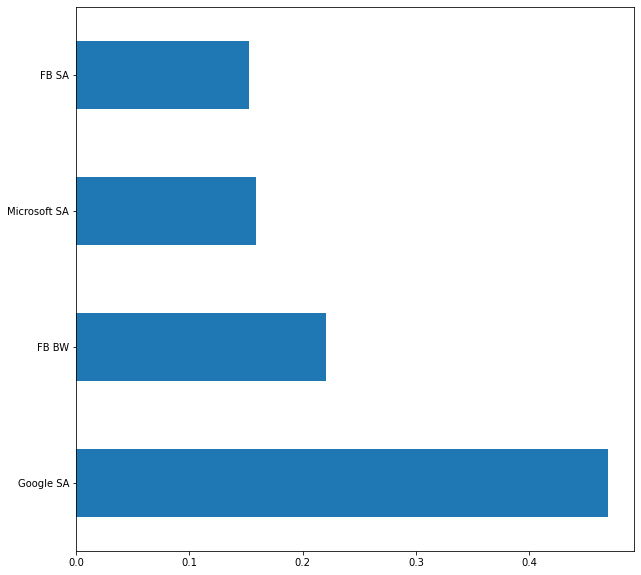

In [21]:
df_fi = df_2021.drop(['Date','Year','Month','Year_Month','WeekNumber'], axis=1)
X = df_fi.loc[:, df_fi.columns != 'Revenue']
y = df_fi['Revenue']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [22]:
df_2021[["Google SA","Microsoft SA","FB SA","FB BW"]].agg(['sum'])

,Google SA,Microsoft SA,FB SA,FB BW
sum,226226.86,21147.03,12730.92,5895.15


In [49]:
df[['Revenue','Year',"Google SA","Microsoft SA","FB SA","FB BW"]].groupby('Year').agg(['sum'])

,Revenue,Google SA,Microsoft SA,FB SA,FB BW
,sum,sum,sum,sum,sum
Year,,,,,
2018,1.319192e+05,56285.66,0.00,0.00,0.00
2019,7.839173e+05,79752.62,3866.91,808.47,356.47
2020,1.442661e+06,108360.57,13746.86,50.00,3627.37
2021,1.391357e+06,117866.29,7400.17,12680.92,2267.78
2022,1.179112e+06,129665.59,11601.01,9006.74,0.00


Google and Microsoft received similar ivestment (~ Two Hundred Thousand pounds), followed by FB SA and FB BW. 
Google has been shown to be the most important feature and merits the elevated investment. 
FB BW is the seconf most important feature despite receiving the least investment - by far. 
The remaining two channels then have a similar importance thereafter. 

### Normality Tets

In [24]:
from scipy.stats import normaltest
for column in ["Google SA","Microsoft SA","FB SA","FB BW","Revenue"]:
    print("{}: {}".format(column, normaltest(df_2021[column])))

Google SA: NormaltestResult(statistic=228.13636325802042, pvalue=2.8894697873043267e-50)
Microsoft SA: NormaltestResult(statistic=56.71427790566634, pvalue=4.83783475561795e-13)
FB SA: NormaltestResult(statistic=371.58299466564415, pvalue=2.0501135865645468e-81)
FB BW: NormaltestResult(statistic=132.5543283987554, pvalue=1.645103824543439e-29)
Revenue: NormaltestResult(statistic=38.44837082499048, pvalue=4.4775697129719735e-09)


### Regression Fit 

In [25]:
df_2021 = df_2021.rename(columns={
    "Google SA": "gSA","Microsoft SA": "mSA","FB SA": "fSA","FB BW": "fBW"
})

### Daily Regressions

In [26]:
lm_day_model = sm.ols(formula="Revenue~gSA+"
                          "mSA+"
                          "fSA+"
                          "fBW", data=df_2021).fit()
print(lm_day_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     106.4
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.52e-71
Time:                        12:13:26   Log-Likelihood:                -6474.4
No. Observations:                 731   AIC:                         1.296e+04
Df Residuals:                     726   BIC:                         1.298e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.8090    215.254     -0.296      0.7

### Multicollinearity Test
VIF and multicollinearity->https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [27]:
y, X = dmatrices("Revenue~gSA+mSA+fSA+fBW", df_2021.rename(columns={
        "Google SA":'gSA', 'Microsoft SA':'mSA', 'FB SA': "fSA", "FB BW": "fBW"
}), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,11.648684,Intercept
1,1.051915,gSA
2,1.155839,mSA
3,1.185151,fSA
4,1.008674,fBW


### Predictions for the Daily Model

2020-21:

In [28]:
predictions_daily = pd.DataFrame({
    'Predictions':lm_day_model.predict(df_2021[['gSA','mSA','fSA','fBW']]),
    'Revenue': df_2021['Revenue'],
    'Date': df_2021['Date']
})
predictions_daily['ErrorAbs'] = abs(predictions_daily['Predictions'] - predictions_daily['Revenue'])
predictions_daily= predictions_daily.set_index('Date')
predictions_daily.head()

,Predictions,Revenue,ErrorAbs
Date,,,
2020-01-01,2063.953597,2936.71,872.756403
2020-01-02,4194.151948,3081.64,1112.511948
2020-01-03,3682.220497,2103.87,1578.350497
2020-01-04,2710.882736,1414.10,1296.782736
2020-01-05,3042.160330,1783.76,1258.400330


In [29]:
mape(predictions_daily['Predictions'], predictions_daily['Revenue'])

0.37010206293198766

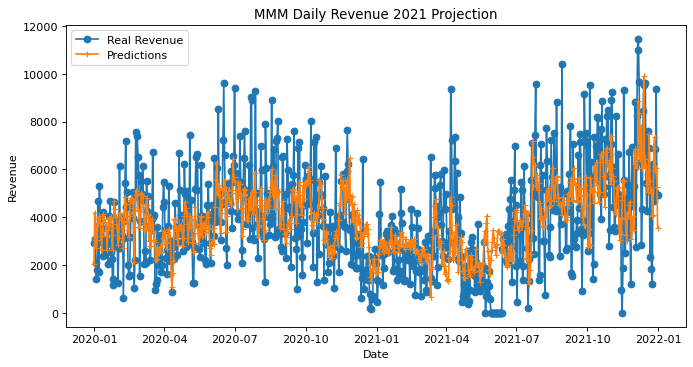

In [30]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_daily["Revenue"], marker='o')
plt.plot(predictions_daily["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Daily Revenue 2021 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

2022:

In [33]:
df_2022=df[df['Year']==2022].rename(columns={
   "Google SA":'gSA', 'Microsoft SA':'mSA', 'FB SA': "fSA", "FB BW": "fBW"
}).reset_index(drop=True)
predictions_daily = pd.DataFrame({
    'Predictions':lm_day_model.predict(df_2022[['gSA','mSA','fSA','fBW']]),
    'Revenue': df_2022['Revenue'],
    'Date': df_2022['Date']
})
predictions_daily['ErrorAbs'] = abs(predictions_daily['Predictions'] - predictions_daily['Revenue'])
predictions_daily= predictions_daily.set_index('Date')
predictions_daily.head()

,Predictions,Revenue,ErrorAbs
Date,,,
2022-01-01,6859.956022,7233.232399,373.276377
2022-01-02,6088.415236,4165.070000,1923.345236
2022-01-03,6425.369588,0.000000,6425.369588
2022-01-04,6516.523110,0.000000,6516.523110
2022-01-05,5295.969821,0.000000,5295.969821


In [34]:
mape(predictions_daily['Predictions'], predictions_daily['Revenue'])

0.527270593823495

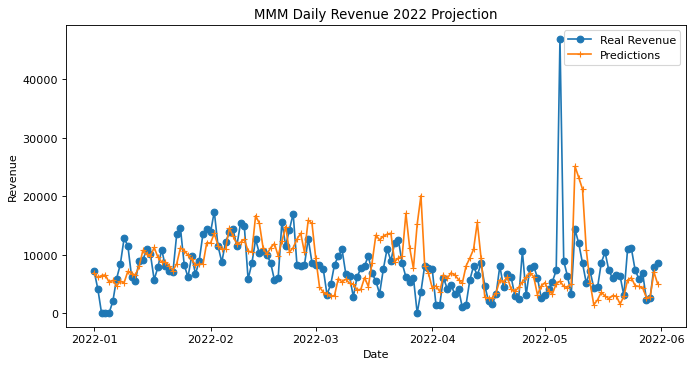

In [35]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_daily["Revenue"], marker='o')
plt.plot(predictions_daily["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Daily Revenue 2022 Projection")
plt.legend(['Real Revenue', 'Predictions'])

# Display
plt.show()

### Predictions for the Weekly Model

Transforming 2021 data to be Weekly:

In [37]:
df_2021_week=df_2021[['Revenue', 'gSA','mSA','fSA','fBW','WeekNumber']]
df_2021_week=df_2021_week[df_2021_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_2021_week =  df_2021_week[['Revenue', 'gSA','mSA','fSA','fBW']].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gSA',
    2: 'mSA',
    3: 'fSA',
    4: 'fBW',
})
df_2021_week['WeekNumber']=df_2021[df_2021['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_2021_week.tail()

,Revenue,gSA,mSA,fSA,fBW,WeekNumber
46,63371.390189,4466.86,569.19,350.34,140.29,47
47,80372.728312,6480.82,494.33,401.12,139.56,48
48,69932.163669,7086.91,433.16,347.45,139.62,49
49,64590.987852,7018.89,372.23,420.04,85.00,50
50,45694.085037,6450.62,269.05,418.71,69.90,51


In [38]:
df_2022_week=df_2022[['Revenue', 'gSA','mSA','fSA','fBW','WeekNumber']]
df_2022_week=df_2022_week[df_2022_week['WeekNumber'] < 52].groupby('WeekNumber').agg([sum])
df_2022_week =  df_2022_week[['Revenue', 'gSA','mSA','fSA','fBW']].reset_index(drop=True).T.reset_index(drop=True).T.rename(columns={
    0: 'Revenue',
    1: 'gSA',
    2: 'mSA',
    3: 'fSA',
    4: 'fBW',
})
df_2022_week['WeekNumber']=df_2022[df_2022['WeekNumber'] < 52].groupby('WeekNumber').count().reset_index()['WeekNumber']
df_2022_week.head()

,Revenue,gSA,mSA,fSA,fBW,WeekNumber
0,28995.664025,4912.14,68.95,397.33,0.0,1
1,62195.859401,7941.05,71.04,403.85,0.0,2
2,60205.609801,8320.55,63.83,452.49,0.0,3
3,67973.747439,8847.15,84.13,455.28,0.0,4
4,91668.734876,12015.25,113.07,342.29,0.0,5


Fitting the Model

In [39]:
lm_week_model = sm.ols(formula="Revenue~gSA+"
                          "mSA+"
                          "fSA+"
                          "fBW", data=df_2021_week).fit()
print(lm_week_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     31.38
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.27e-12
Time:                        12:17:43   Log-Likelihood:                -526.01
No. Observations:                  51   AIC:                             1062.
Df Residuals:                      46   BIC:                             1072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    342.1679   6242.876      0.055      0.9

### Multicollinearity Test

In [40]:
y, X = dmatrices("Revenue~gSA+mSA+fSA+fBW", df_2021_week, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,33.679530,Intercept
1,1.154148,gSA
2,1.097682,mSA
3,1.472775,fSA
4,1.365968,fBW


2020-21:

In [41]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_2021_week[['gSA','mSA','fSA','fBW']]),
    'Revenue': df_2021_week['Revenue'],
    'WeekNumber': df_2021_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,35148.278653,32398.19,1,2750.088653
1,43978.655516,44596.70,2,618.044484
2,44613.680001,41743.13,3,2870.550001
3,45302.303304,35603.99,4,9698.313304
4,47026.832219,42364.08,5,4662.752219


In [42]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])


0.11568863477198081

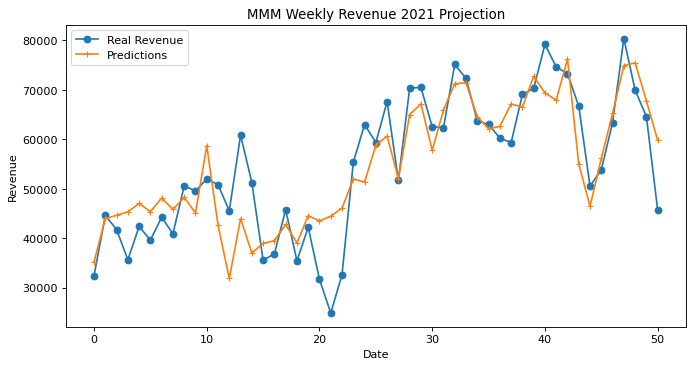

In [43]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2021 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

2022:

In [44]:
predictions_weekly = pd.DataFrame({
    'Predictions':lm_week_model.predict(df_2022_week[['gSA','mSA','fSA','fBW']]),
    'Revenue': df_2022_week['Revenue'],
    'WeekNumber': df_2022_week['WeekNumber']
})
predictions_weekly['ErrorAbs'] = abs(predictions_weekly['Predictions'] - predictions_weekly['Revenue'])
predictions_weekly.head()

,Predictions,Revenue,WeekNumber,ErrorAbs
0,36397.696530,28995.664025,1,7402.032505
1,53092.065599,62195.859401,2,9103.793802
2,55844.050813,60205.609801,3,4361.558988
3,59353.073830,67973.747439,4,8620.673609
4,75392.606332,91668.734876,5,16276.128544


In [45]:
predictions_weekly.to_csv('B_NEW_Weekly_2022_predvact.csv')

In [46]:
mape(predictions_weekly['Predictions'], predictions_weekly['Revenue'])


0.38441568504388984

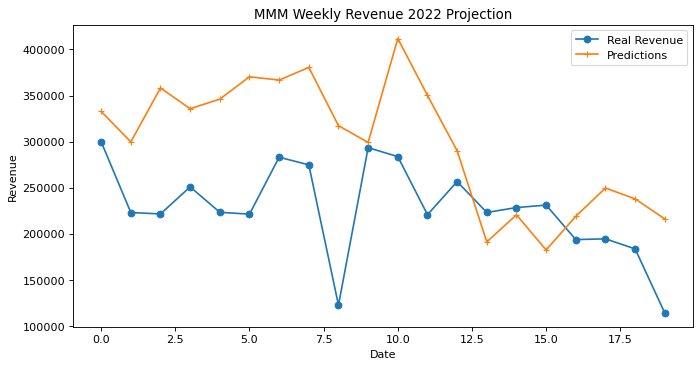

In [64]:
figure(figsize=(10, 5), dpi=80)
plt.plot(predictions_weekly["Revenue"], marker='o')
plt.plot(predictions_weekly["Predictions"], marker='+')

# Labelling
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("MMM Weekly Revenue 2022 Projection")
plt.legend(['Real Revenue', 'Predictions'])
# Display

plt.show()

## Log-Log Modelling

In [47]:
def transform_log(x):
    if x == 0:
        x += 0.000001
    return math.log(x)

df_2021_log = df_2021_week.rename(columns={
               "Google SA":'gSA', 'Microsoft SA':'mSA', 'FB SA': "fSA", "FB BW": "fBW"
})
for column in ['gSA','mSA','fSA','fBW',"Revenue"]:
    df_2021_log['{}Log'.format(column)] = df_2021_log[column].apply(lambda x: transform_log(x))

In [48]:
log_model = sm.ols(formula="RevenueLog~gSALog+mSALog+fSALog+fBWLog", data=df_2021_log).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:             RevenueLog   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           4.63e-08
Time:                        12:20:45   Log-Likelihood:                 14.606
No. Observations:                  51   AIC:                            -19.21
Df Residuals:                      46   BIC:                            -9.554
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3283      0.995      3.346      0.0